In [108]:
#数据来源：CEIC中国M2，货币与准货币，国内生产总值平减指数
import pandas as pd
import os
import numpy as np

data = pd.read_excel('data.xlsx')
data = data[25:]
data = data.rename(columns={'Unnamed: 0':'quater','国内生产总值平减指数：同比：季度：中国':'gdpdeflator','货币供应:(M2)货币和准货币':'m2'})
data = data[~data.gdpdeflator.isnull()]
data[['gdpdeflator','m2']] = data[['gdpdeflator','m2']].astype(float)
data['logm2'] = np.log2(data['m2'])
gd = data['gdpdeflator']
m2 = data['logm2']

Int64Index([ 25,  28,  31,  34,  37,  40,  43,  46,  49,  52,
            ...
            298, 301, 304, 307, 310, 313, 316, 319, 322, 325],
           dtype='int64', length=101)

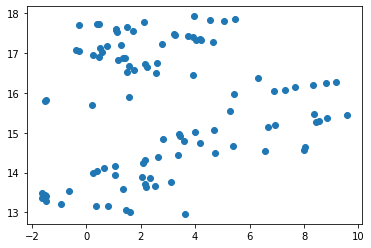

In [72]:
from matplotlib import pyplot as plt
plt.scatter(gd,m2)

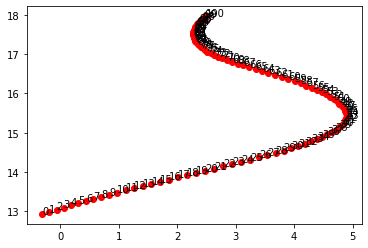

In [112]:
import statsmodels.api as sm
gdcycle , gdtrend = sm.tsa.filters.hpfilter(gd,16000)
m2cycle , m2trend = sm.tsa.filters.hpfilter(m2,16000)
n = np.arange(len(gdtrend))

gdtrend.index = n
m2trend.index = n

fig,ax = plt.subplots()
ax.scatter(gdtrend,m2trend,c ='r')

for i,txt in enumerate(n):
    ax.annotate(txt,(gdtrend[i],m2trend[i]))

fig.savefig('scatteronm2andgd.png')


In [111]:
data.index = n
data.to_excel('newdata.xlsx')

## 结论
1. 在中国，以GDP平减指数为参考的通货膨胀率和以M2计量的货币量二者的长期趋势（HP=16000）在大部分时间内呈现一一对应的情况，按照Sargent和Surico(2011)的观点，如果货币当局没有有意的去控制通货膨胀（通过中央银行的政策工具，如准备金率、公开市场操作、利率管控等），这种满足货币数量论的情况将会出现。
2. 无法形成一一对应关系的点集中于两段时期：次贷危机前后和新冠疫情之后，当局可能由于较为糟糕的经济前景，变得对通胀数字更为关注，从而扰乱了货币数量论$P=M/V$的关系。
3. 数据中缺失了97年前的部分，因此我们难以判断泰铢危机是否影响了当局对通货膨胀的关注，仅以这部分数据判断中国货币当局会因对经济前景的担忧而开始关注通货膨胀率，理由还不够充分。